### Setup inicial

In [1]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Librerías BN
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import HillClimbSearch, BIC, K2, BDeu
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator
from pgmpy.readwrite import BIFWriter

# Configuración general
pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (8, 6)

print("✅ Librerías cargadas")


/home/carlosbravo/Documents/MasOrange/Code/BN_Film_Recommender/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Librerías cargadas


### Cargar y preparar datos

In [2]:
# Cargar dataset
data = pd.read_csv("tv_bn_dataset.csv")

# Convertir todas las variables a categóricas (importante para BN)
for c in data.columns:
    data[c] = data[c].astype("category")

print("✅ Datos cargados y convertidos a categóricos")
display(data.head())


✅ Datos cargados y convertidos a categóricos


,EdadUsuario,Hora,DiaSemana,DuracionPrograma,InteresPrevio,GeneroPrograma,Satisfaccion,Recomendado
0,joven,tarde,fin_semana,media,noticias,entretenimiento,media,sí
1,mayor,tarde,laboral,media,noticias,noticias,media,no
2,adulto,mañana,laboral,larga,noticias,noticias,alta,sí
3,adulto,tarde,laboral,corta,noticias,entretenimiento,alta,sí
4,joven,tarde,laboral,media,noticias,noticias,alta,sí


### Comparar métodos de scoring

#### 1. BIC

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}
  0%|          | 12/1000000 [00:00<18:22:45, 15.11it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', '

✅ Modelo aprendido con BIC
✅ Modelo entrenado con BIC


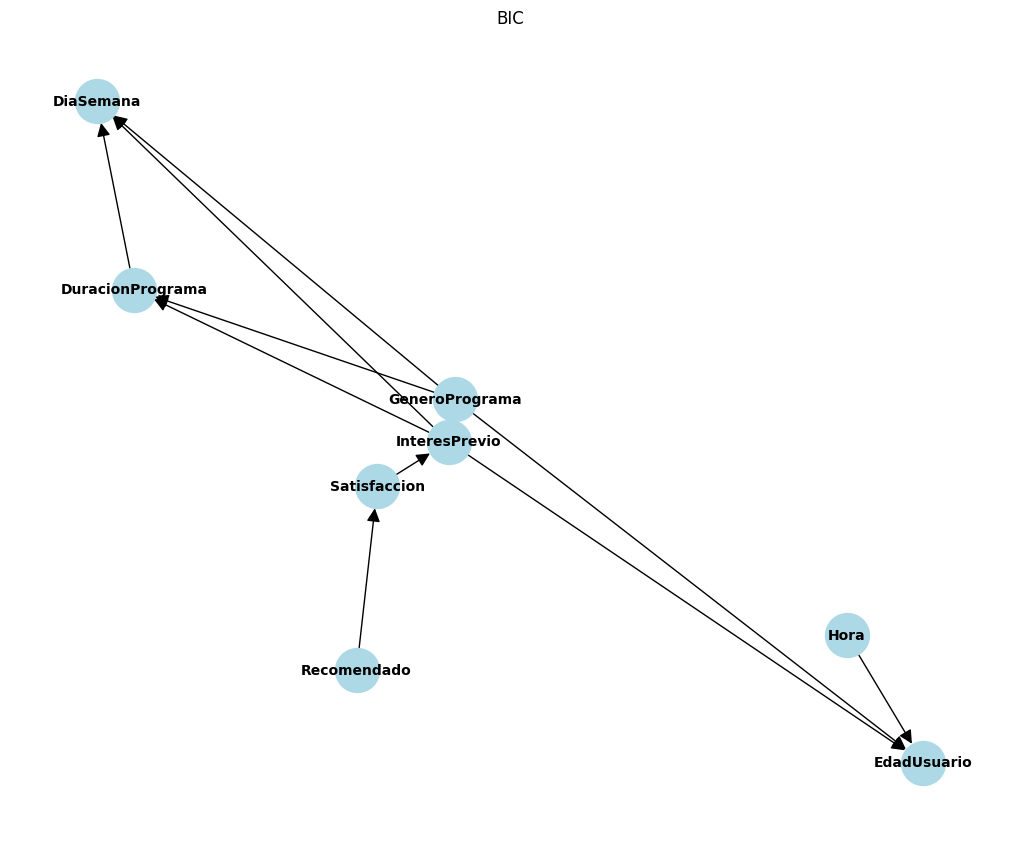

In [3]:
hc = HillClimbSearch(data)
best_model = hc.estimate(scoring_method=BIC(data))
print("✅ Modelo aprendido con BIC")

model = DiscreteBayesianNetwork(best_model.edges())
model.fit(data, estimator=BayesianEstimator)
print("✅ Modelo entrenado con BIC")

# Convertir a un grafo de networkx y visualizar la estructura del modelo
G = nx.DiGraph()
G.add_nodes_from(model.nodes())
G.add_edges_from(model.edges())

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
plt.title("BIC")
plt.show()



#### 2. K2

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}
  0%|          | 12/1000000 [00:00<16:19:18, 17.02it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', '

✅ Modelo aprendido con K2
✅ Modelo entrenado con K2


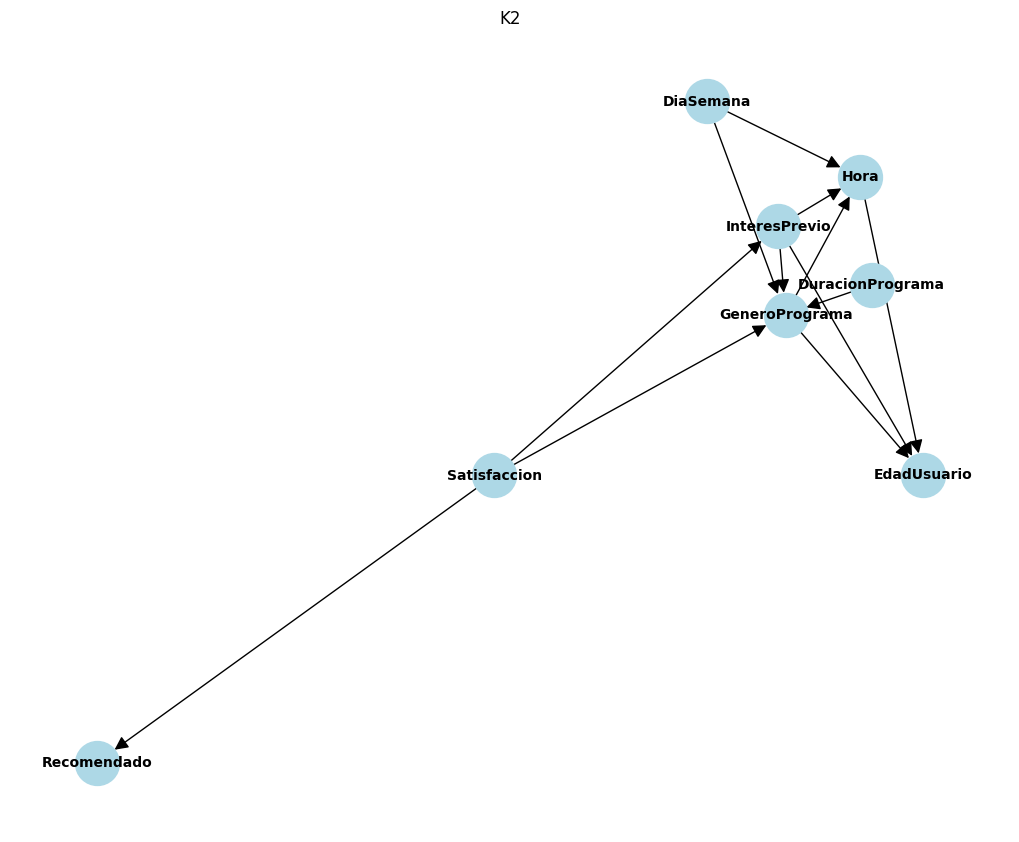

In [4]:
hc = HillClimbSearch(data)
best_model_K2 = hc.estimate(scoring_method=K2(data))
print("✅ Modelo aprendido con K2")


model_K2 = DiscreteBayesianNetwork(best_model_K2.edges())
model_K2.fit(data, estimator=BayesianEstimator)
print("✅ Modelo entrenado con K2")

# Convertir a un grafo de networkx y visualizar la estructura del modelo
G_K2 = nx.DiGraph()
G_K2.add_nodes_from(model_K2.nodes())
G_K2.add_edges_from(model_K2.edges())

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_K2, seed=42)
nx.draw(G_K2, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
plt.title("K2")
plt.show()



#### 3. BDeu

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}


--- equivalent_sample_size = 1 ---


  0%|          | 7/1000000 [00:00<23:36:58, 11.76it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}


Edges: [('DiaSemana', 'GeneroPrograma'), ('DuracionPrograma', 'GeneroPrograma'), ('InteresPrevio', 'GeneroPrograma'), ('GeneroPrograma', 'EdadUsuario'), ('Satisfaccion', 'Recomendado'), ('Satisfaccion', 'GeneroPrograma'), ('Recomendado', 'InteresPrevio')]


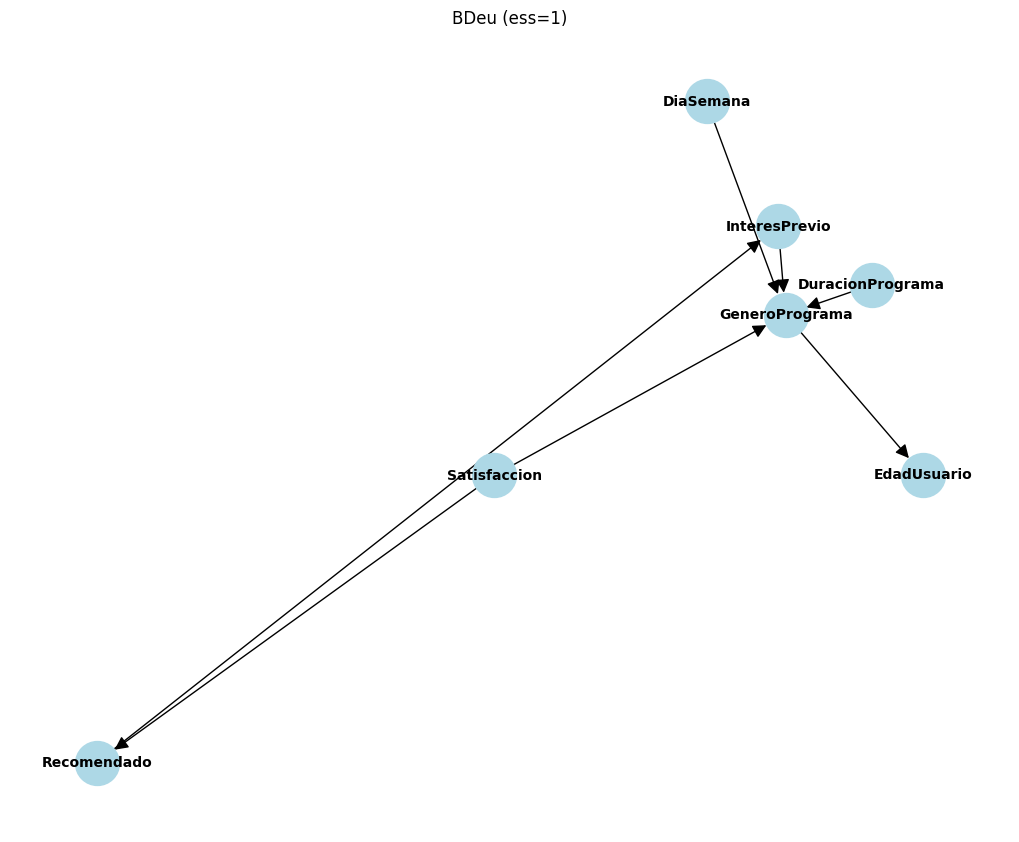

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}


--- equivalent_sample_size = 5 ---


  0%|          | 9/1000000 [00:00<19:07:05, 14.53it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}


Edges: [('Hora', 'EdadUsuario'), ('DiaSemana', 'GeneroPrograma'), ('DuracionPrograma', 'GeneroPrograma'), ('InteresPrevio', 'GeneroPrograma'), ('InteresPrevio', 'EdadUsuario'), ('GeneroPrograma', 'EdadUsuario'), ('Satisfaccion', 'GeneroPrograma'), ('Satisfaccion', 'InteresPrevio'), ('Recomendado', 'Satisfaccion')]


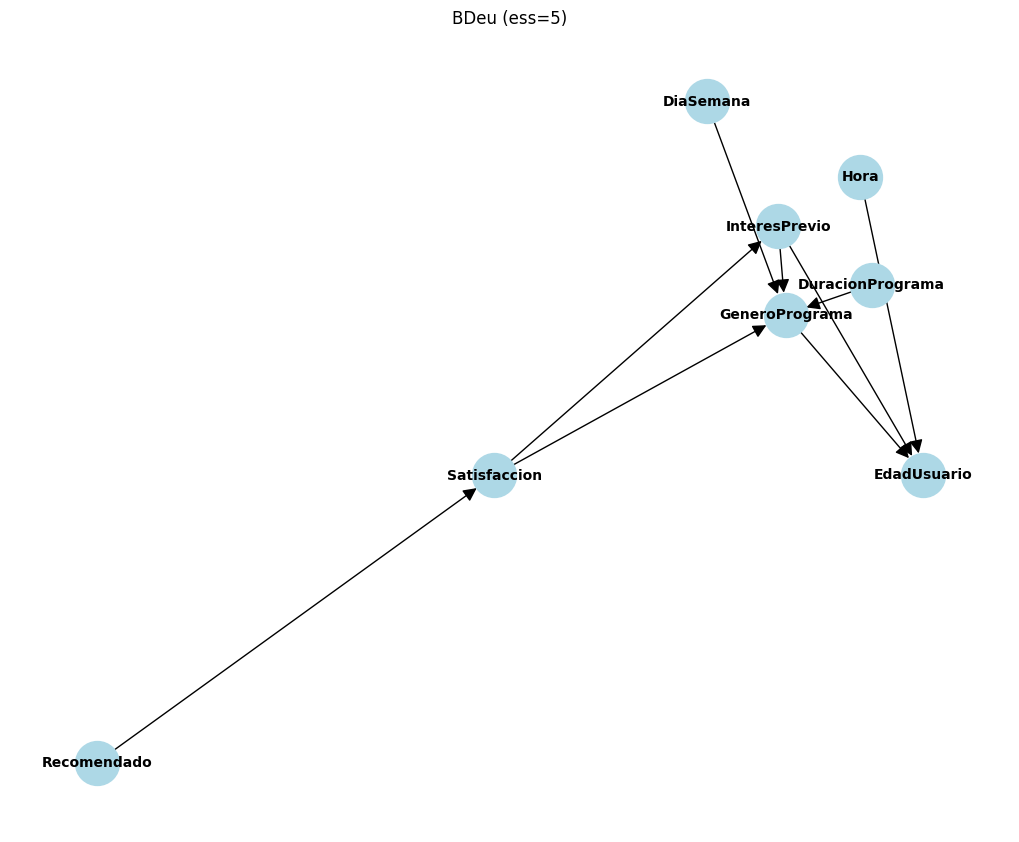

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}


--- equivalent_sample_size = 10 ---


  0%|          | 15/1000000 [00:00<15:59:05, 17.38it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}


Edges: [('Hora', 'EdadUsuario'), ('DiaSemana', 'InteresPrevio'), ('DiaSemana', 'DuracionPrograma'), ('DiaSemana', 'GeneroPrograma'), ('DiaSemana', 'Hora'), ('InteresPrevio', 'DuracionPrograma'), ('InteresPrevio', 'EdadUsuario'), ('InteresPrevio', 'Hora'), ('GeneroPrograma', 'InteresPrevio'), ('GeneroPrograma', 'DuracionPrograma'), ('GeneroPrograma', 'EdadUsuario'), ('GeneroPrograma', 'Hora'), ('Satisfaccion', 'Recomendado'), ('Satisfaccion', 'InteresPrevio'), ('Satisfaccion', 'GeneroPrograma')]


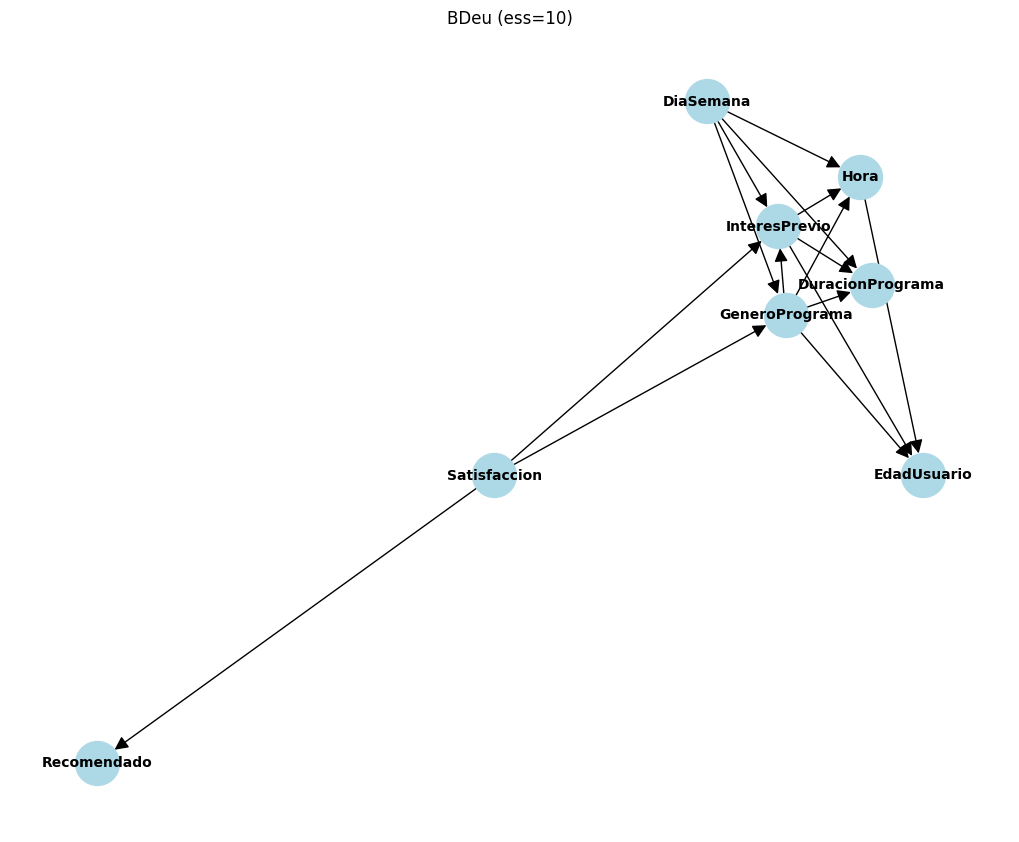

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}


--- equivalent_sample_size = 50 ---


  0%|          | 13/1000000 [00:00<18:30:04, 15.01it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}


Edges: [('EdadUsuario', 'GeneroPrograma'), ('EdadUsuario', 'InteresPrevio'), ('Hora', 'GeneroPrograma'), ('DuracionPrograma', 'DiaSemana'), ('InteresPrevio', 'DiaSemana'), ('InteresPrevio', 'DuracionPrograma'), ('GeneroPrograma', 'InteresPrevio'), ('GeneroPrograma', 'DuracionPrograma'), ('GeneroPrograma', 'DiaSemana'), ('Satisfaccion', 'InteresPrevio'), ('Recomendado', 'Satisfaccion')]


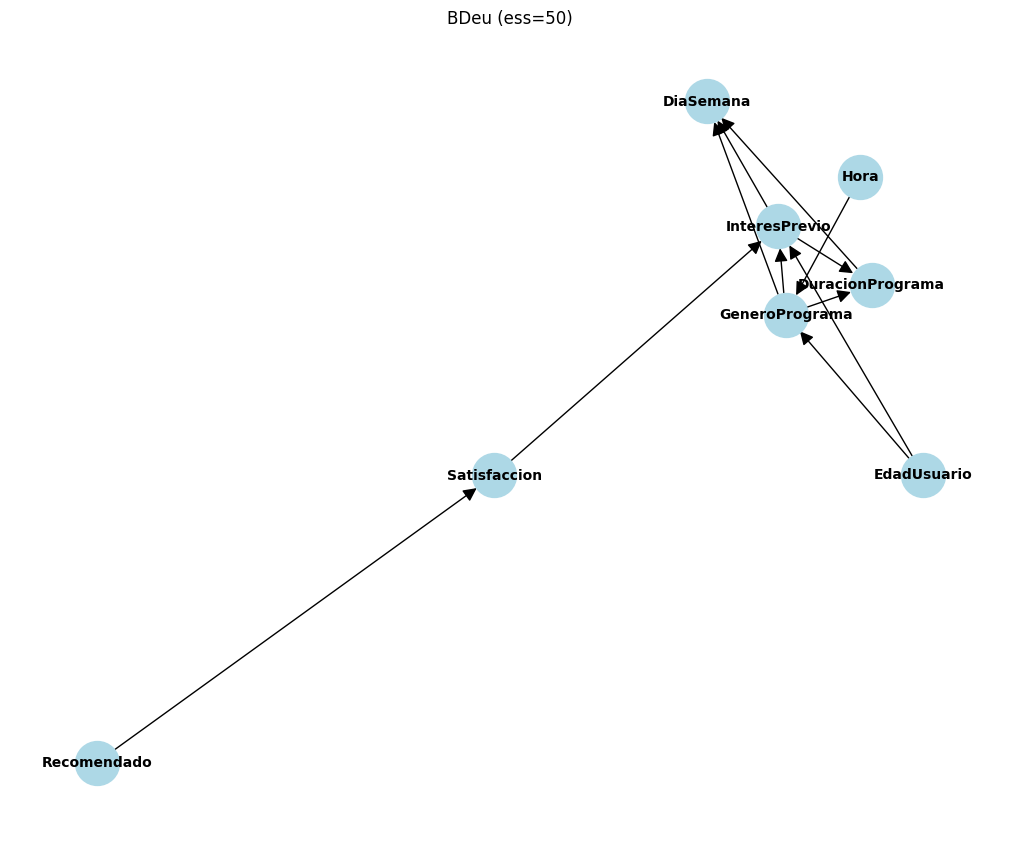

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}


--- equivalent_sample_size = 100 ---


  0%|          | 14/1000000 [00:00<15:41:15, 17.71it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}


Edges: [('Hora', 'EdadUsuario'), ('DiaSemana', 'InteresPrevio'), ('DiaSemana', 'GeneroPrograma'), ('DiaSemana', 'Hora'), ('DuracionPrograma', 'InteresPrevio'), ('DuracionPrograma', 'GeneroPrograma'), ('InteresPrevio', 'EdadUsuario'), ('InteresPrevio', 'Hora'), ('GeneroPrograma', 'InteresPrevio'), ('GeneroPrograma', 'EdadUsuario'), ('GeneroPrograma', 'Hora'), ('Satisfaccion', 'InteresPrevio'), ('Satisfaccion', 'GeneroPrograma'), ('Recomendado', 'Satisfaccion')]


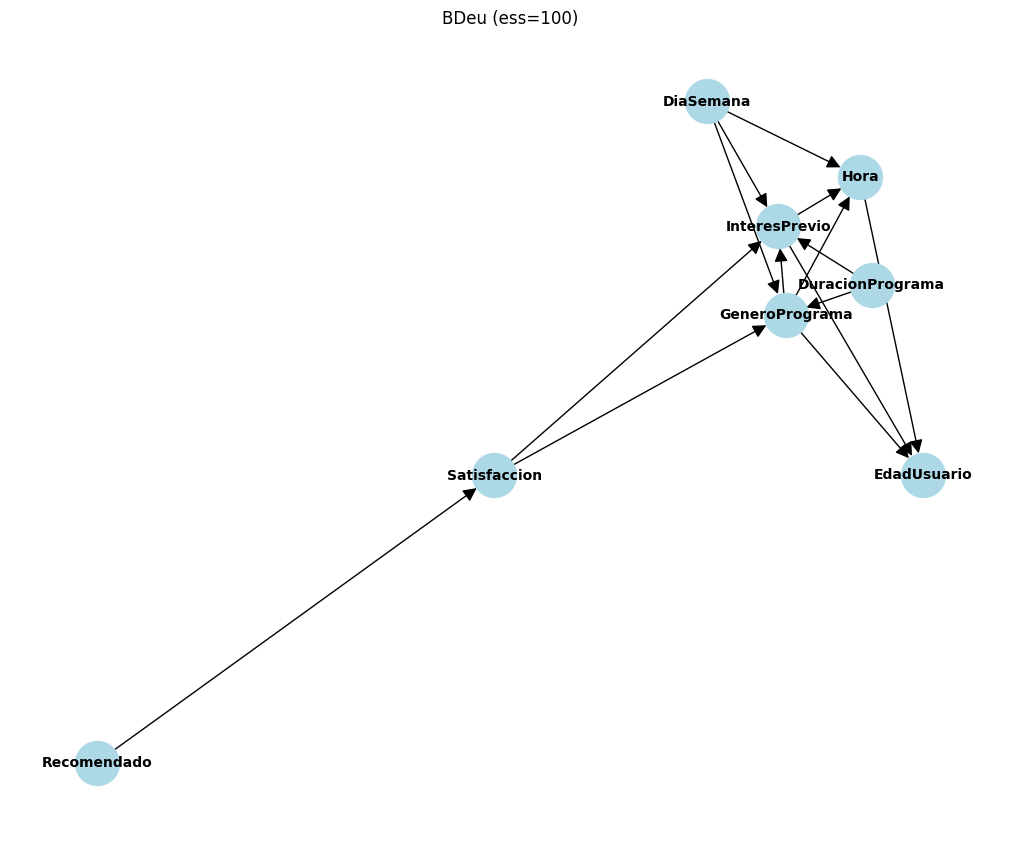

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}


--- equivalent_sample_size = 500 ---


  0%|          | 17/1000000 [00:00<15:42:14, 17.69it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'EdadUsuario': 'C', 'Hora': 'C', 'DiaSemana': 'C', 'DuracionPrograma': 'C', 'InteresPrevio': 'C', 'GeneroPrograma': 'C', 'Satisfaccion': 'C', 'Recomendado': 'C'}


Edges: [('Hora', 'EdadUsuario'), ('DiaSemana', 'InteresPrevio'), ('DiaSemana', 'GeneroPrograma'), ('DiaSemana', 'Hora'), ('DiaSemana', 'EdadUsuario'), ('DuracionPrograma', 'InteresPrevio'), ('DuracionPrograma', 'GeneroPrograma'), ('DuracionPrograma', 'Hora'), ('InteresPrevio', 'EdadUsuario'), ('InteresPrevio', 'Hora'), ('GeneroPrograma', 'InteresPrevio'), ('GeneroPrograma', 'EdadUsuario'), ('GeneroPrograma', 'Hora'), ('Satisfaccion', 'InteresPrevio'), ('Satisfaccion', 'GeneroPrograma'), ('Recomendado', 'Satisfaccion')]


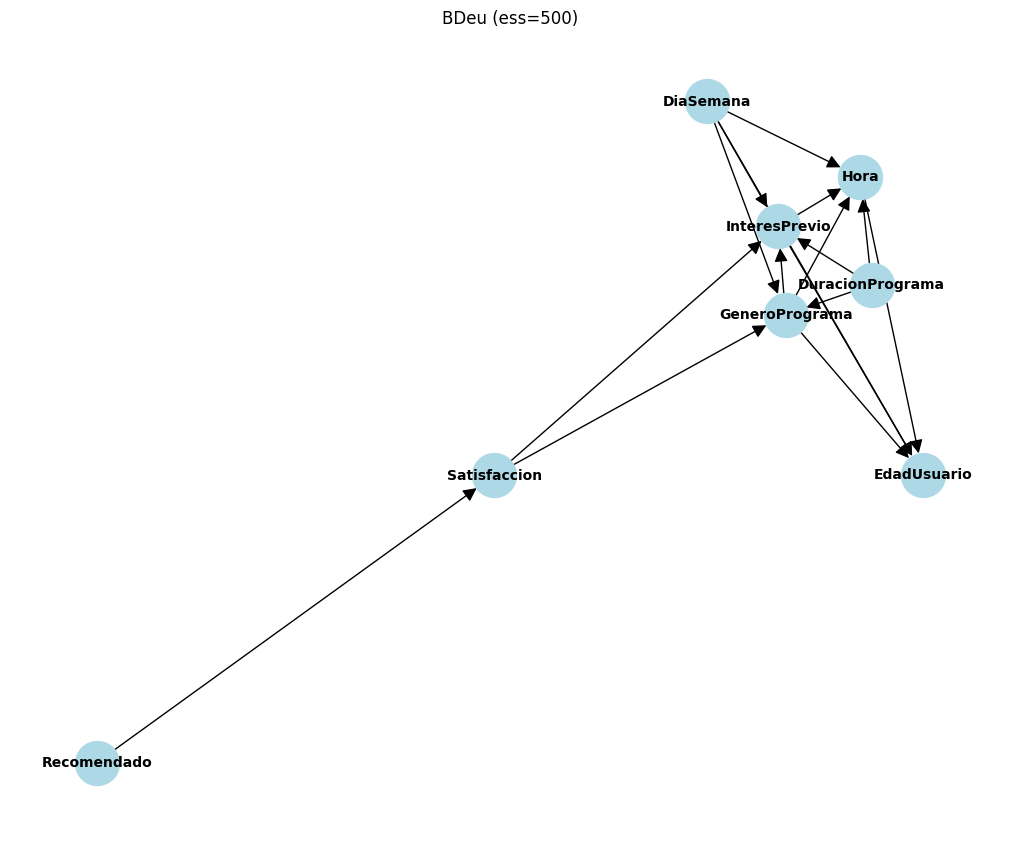

In [5]:
ess_list = [1, 5, 10, 50, 100, 500]

for ess in ess_list:
    print(f"--- equivalent_sample_size = {ess} ---")
    best_model_BDeu = hc.estimate(scoring_method=BDeu(data, equivalent_sample_size=ess))
    print("Edges:", list(best_model_BDeu.edges()))
    
    model_BDeu = DiscreteBayesianNetwork(best_model_BDeu.edges())
    model_BDeu.fit(data, estimator=BayesianEstimator)
    
    # Grafo y visualización (usa pos si ya existe para mantener la disposición)
    G_BDeu = nx.DiGraph()
    G_BDeu.add_nodes_from(model_BDeu.nodes())
    G_BDeu.add_edges_from(model_BDeu.edges())

    plt.figure(figsize=(10, 8))
    layout = pos if 'pos' in globals() else nx.spring_layout(G_BDeu, seed=42)
    nx.draw(G_BDeu, layout, with_labels=True, node_size=1000, node_color="lightblue",
            font_size=10, font_weight="bold", arrowsize=20)
    plt.title(f"BDeu (ess={ess})")
    plt.show()


